In [92]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.style.use("ggplot")
%matplotlib inline

In [93]:
Hdata=pd.read_csv('dataset.csv')
Hdata.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.780088,NaN,NaN,NaN,0.803526,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.561473,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.817810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.734438,0.918015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [94]:
Hdata.shape

(1012, 81)

In [95]:
Hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 81 columns):
var0     38 non-null float64
var1     1 non-null float64
var2     6 non-null float64
var3     0 non-null float64
var4     1 non-null float64
var5     0 non-null float64
var6     0 non-null float64
var7     1 non-null float64
var8     0 non-null float64
var9     1 non-null float64
var10    0 non-null float64
var11    0 non-null float64
var12    1 non-null float64
var13    4 non-null float64
var14    1 non-null float64
var15    3 non-null float64
var16    2 non-null float64
var17    0 non-null float64
var18    0 non-null float64
var19    0 non-null float64
var20    0 non-null float64
var21    0 non-null float64
var22    0 non-null float64
var23    0 non-null float64
var24    5 non-null float64
var25    1 non-null float64
var26    11 non-null float64
var27    1 non-null float64
var28    5 non-null float64
var29    0 non-null float64
var30    0 non-null float64
var31    0 non-null flo

In [96]:
Hdata_0=Hdata.fillna(0)

In [97]:
Hdata_0.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.780088,0.000000,0.0,0.0,0.803526,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.561473,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.817810,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.734438,0.918015,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [98]:
Hdata_0.describe()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80
count,1012.000000,1012.000000,1012.000000,1012.0,1012.000000,1012.0,1012.0,1012.000000,1012.0,1012.000000,...,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.0,1012.000000,1012.000000
mean,0.020349,0.000350,0.004336,0.0,0.000464,0.0,0.0,0.000423,0.0,0.000752,...,0.515522,0.159689,0.022481,0.019304,0.057418,0.000411,0.001497,0.0,0.006097,0.599802
std,0.110342,0.011122,0.059011,0.0,0.014751,0.0,0.0,0.013457,0.0,0.023927,...,0.409971,0.338589,0.107622,0.119624,0.190881,0.013078,0.028399,0.0,0.056216,0.490180
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.635495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.921398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,0.979691,0.353806,0.982232,0.0,0.469247,0.0,0.0,0.428085,0.0,0.761168,...,0.996987,0.999477,0.868537,0.966329,0.994136,0.416034,0.681541,0.0,0.854564,1.000000


In [121]:
columns_null= [i for i in Hdata_0.keys() if Hdata_0[i].mean() < 0.16]

In [122]:
Hdata_0_dropnull = Hdata_0.drop(columns_null, axis=1)

In [123]:
Hdata_0_dropnull.head()

,var39,var61,var68,var69,var71,var80
0,0.000000,0.742548,0.000000,0.000000,0.780088,1
1,0.310861,0.000000,0.984366,0.955945,0.000000,0
2,0.000000,0.988848,0.000000,0.000000,0.817810,1
3,0.000000,0.000000,0.998717,0.990744,0.734438,0
4,0.000000,0.987820,0.000000,0.000000,0.000000,1


In [124]:
Hdata_0_dropnull.describe()

,var39,var61,var68,var69,var71,var80
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,0.282068,0.556830,0.164256,0.209723,0.515522,0.599802
std,0.370451,0.476922,0.351583,0.379524,0.409971,0.490180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.923461,0.000000,0.000000,0.635495,1.000000
75%,0.636234,0.993342,0.000000,0.000000,0.921398,1.000000
max,0.989177,0.999475,0.998717,0.998891,0.996987,1.000000


In [125]:
Hdata_0_dropnull.shape

(1012, 6)

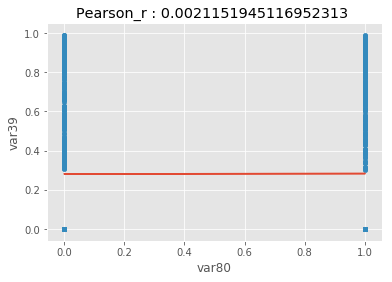

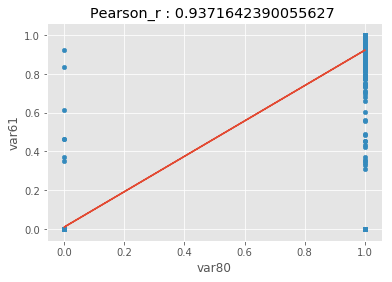

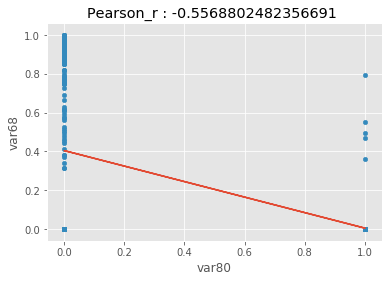

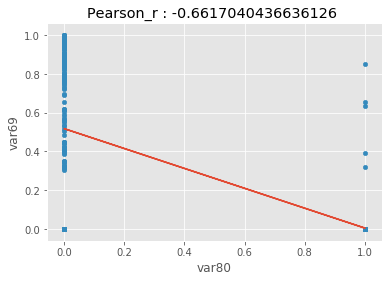

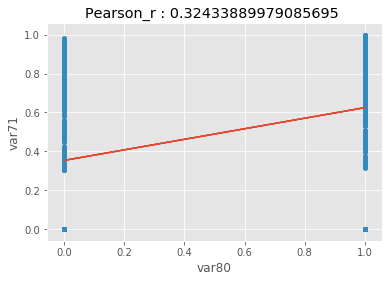

In [126]:
for i in range(5):
    x='var80'
    y=Hdata_0_dropnull.keys()[i]
    title = np.corrcoef(Hdata_0_dropnull[x].values,Hdata_0_dropnull[y].values)[0,1]
    a, b = np.polyfit(Hdata_0_dropnull[x].values,Hdata_0_dropnull[y].values, 1)
    z=Hdata_0_dropnull[x].values
    Hdata_0_dropnull.plot(x='var80', y=Hdata_0_dropnull.keys()[i], kind ='scatter')
    plt.plot(z, a*z+b)
    plt.xlabel('var80')
    plt.ylabel(y)
    plt.title("Pearson_r : {} ". format(title))

In [127]:
pd.value_counts(Hdata_0['var80'])

1    607
0    405
Name: var80, dtype: int64

In [128]:
X = Hdata_0_dropnull.drop("var80", axis=1)
y = Hdata_0_dropnull["var80"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [129]:
frac_X_train = (X_train.shape[0]/X.shape[0])*100
frac_X_test = (X_test.shape[0]/X.shape[0])*100
print("frac X_train {0:.2f}%, X_test {1:.2f}% ".format(frac_X_train, frac_X_test))

frac X_train 79.94%, X_test 20.06% 


In [130]:
knn = KNeighborsClassifier() # default value n_neighbors=5

In [131]:
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [132]:
y_pred = knn.predict(X_test)
type(y_pred)
type(y_test)

pandas.core.series.Series

In [133]:
# print the accuracy
knn.score(X_test, y_test)

0.9704433497536946

In [134]:
print(y_test.value_counts())
pd.value_counts(y_pred)

1    122
0     81
Name: var80, dtype: int64


1    116
0     87
dtype: int64

In [135]:
print(confusion_matrix(y_test, y_pred))

[[ 81   0]
 [  6 116]]


In [136]:
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
TN, FP, FN, TP = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
print("TP {}, FN {}, FP {}, TN {} ".format(TN, FP, FN, TP))
print("accuracy : ", (TP+TN)/(TP+TN+FP+FN))

[[116   6]
 [  0  81]]
TP 116, FN 6, FP 0, TN 81 
accuracy :  0.9704433497536946


In [137]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        81
          1       1.00      0.95      0.97       122

avg / total       0.97      0.97      0.97       203



In [138]:
y_pred_knn_prob = knn.predict_proba(X_test)
print(y_pred_knn_prob[0:10])
y_pred[0:10]

[[0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]]


array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [139]:
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, y_pred_knn_prob[:,1])

In [140]:
print(knn_fpr)
print(knn_tpr)
print(knn_thresholds)
type(knn_tpr)

[0.         0.         0.09876543 0.22222222 1.        ]
[0.93442623 0.95081967 0.97540984 0.98360656 1.        ]
[1.  0.8 0.4 0.2 0. ]


numpy.ndarray

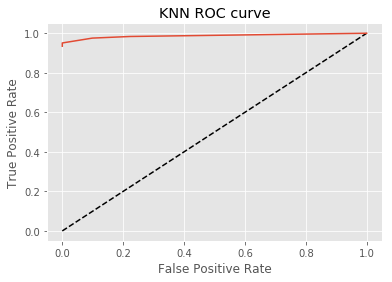

In [141]:
plt.plot([0,1], [0,1], "k--")
plt.plot(knn_fpr, knn_tpr, label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC curve");

In [120]:
auc_score_knn = roc_auc_score(y_test, y_pred_knn_prob[:,1])
print("auc score knn : ", auc_score_knn)

auc score knn :  0.9920056668690549
